# NSL Notebook 02

## Exercise 02.1

Importing `I1-blk.csv` and `I2-blk.csv` (important sampling), and plot using `Dataframe` tools

In [2]:
######                        #######
##  IMPORT DEFAULT PKGS and VARS   ##
######                        #######

from default import *

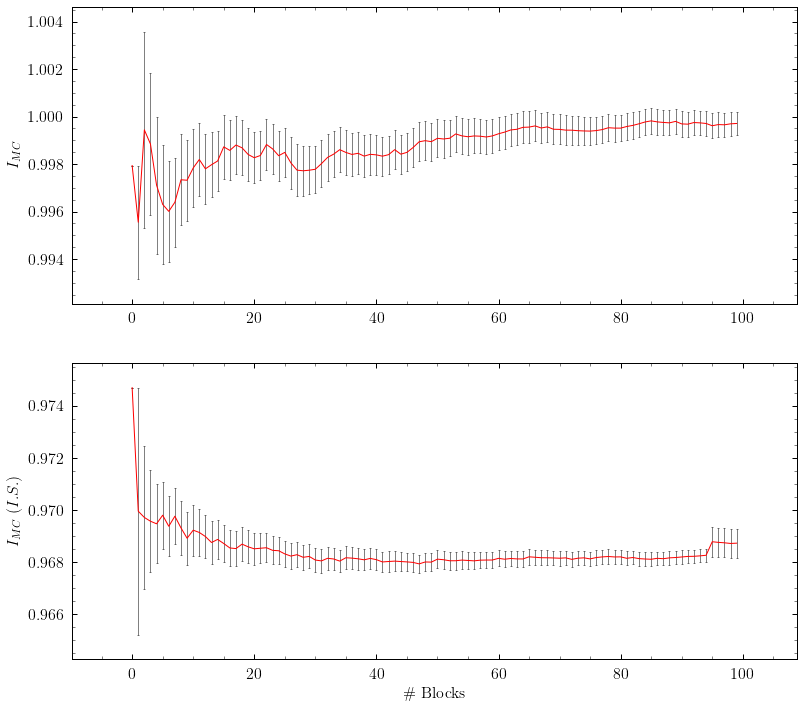

In [3]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(13,12))

# load MC integral results
df1 = pd.read_csv("I1-blk.csv", header=None, names=["mean","mean_err"])
df1["mean"].plot.line(yerr=df1["mean_err"], color='r', ecolor='gray', capthick=0.5, ax=ax1)

# load MC integral results, important sampling
df2 = pd.read_csv("I2-blk.csv", header=None, names=["var","var_err"])
df2["var"].plot.line(yerr=df2["var_err"], color='r', ecolor='gray', capthick=0.5, ax=ax2)

ax1.set_ylabel("$I_{MC}$");

ax2.set_xlabel("\# Blocks");
ax2.set_ylabel("$I_{MC}\;(I.S.)$");

## Exercise 02.2
Importing `DRW_mean.out` `DRW_dev.out` for discrete RW and `CRW_mean.out` `CRW_dev.out` for continuum RW

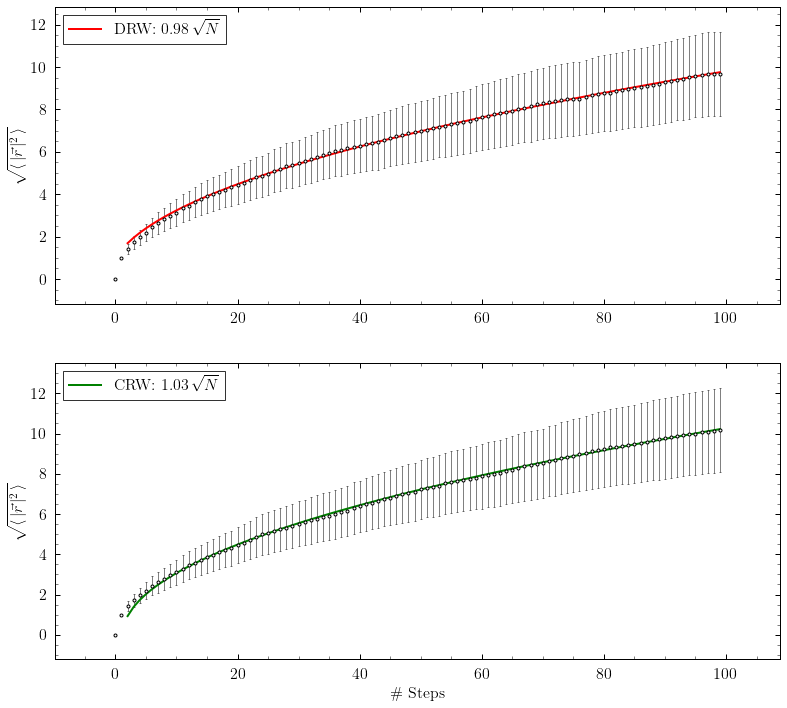

In [61]:
def fit(df, name):
    p = np.polyfit(df.index, df["mean"]**2, 1)
    v = np.polyval(p, df.index[2:])**(0.5)
    a = np.round(np.sqrt(p[0]),2)
    dfit = pd.DataFrame(v, index=df.index[2:], columns=[name+str(a)+"$\,\sqrt{N}$"])
    return dfit


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(13,12))

# plot continuum RW
dfD_mean = pd.read_csv("DRW_mean.out", header=None, names=["mean"])
dfD_err = pd.read_csv("DRW_dev.out", header=None, names=["dev"])

dfD_mean["mean"].plot.line(ls='', yerr=dfD_err["dev"], marker='.', mfc='w', ecolor='gray', capthick=0.5, ax=ax1);

# fit discrete RW
fit(dfD_mean, "DRW: ").plot.line(color='r', lw=2, ax=ax1);


# plot continuum RW
dfC_mean = pd.read_csv("CRW_mean.out", header=None, names=["mean"])
dfC_err = pd.read_csv("CRW_dev.out", header=None, names=["dev"])

dfC_mean["mean"].plot.line(ls='', yerr=dfC_err["dev"], marker='.', mfc='w', ecolor='gray', capthick=0.5, ax=ax2);

# fit continuum RW
fit(dfC_mean, "CRW: ").plot.line(color='g', lw=2, ax=ax2);

ax1.set_ylabel("$\sqrt{\langle\,|\\vec{r}\,|^2\,\\rangle}$");
ax2.set_xlabel("\# Steps");
ax2.set_ylabel("$\sqrt{\langle\,|\\vec{r}\,|^2\,\\rangle}$");